In [23]:
from PipelineFunctions import *

# 1.0 Diabetic Retinopathy Dataset

In [7]:
data_arff = load_arff_file("./data/messidor_features.arff",data_type='float64',delimiter_used=',',skip_rows=24,use_cols=None)

X,y = split_data(data_arff,19,1)

X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

### 1.1 Logistic Regression

Dummy model: LogisticRegression(random_state=0)
With 73.913% train accuracy
With 70.231% test accuracy
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best estimator: LogisticRegression(C=10.0, max_iter=10000, random_state=0, solver='newton-cg')
With 75.901% train accuracy
With 73.41% test accuracy


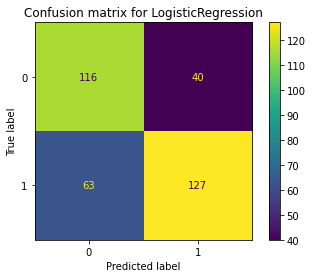

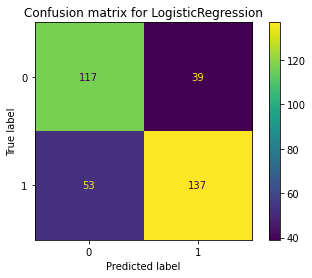

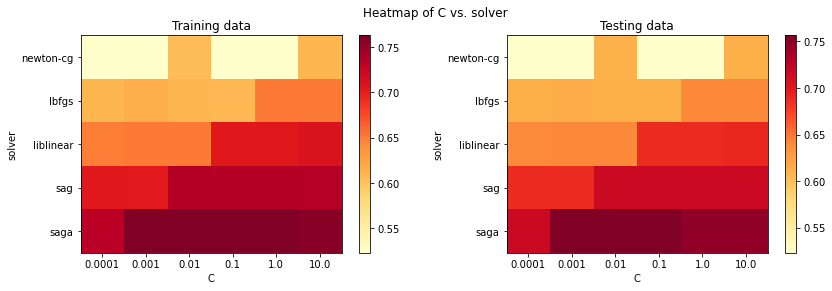

In [8]:
# Test a few different hyperparameters for Logistic Regression: C, solver
c_vals_lr = [0.0001,0.001,0.01,0.1,1.0,10.0]
s_vals_lr = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid_lr ={'C': c_vals_lr, 'solver' : s_vals_lr}

# Train a dummy Logistic Regression model with default values
dummy_lr = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.linear_model.LogisticRegression)

# Train different logistic regression models, using grid search and cross validation to find best hyperparameters.
gs_lr = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.linear_model.LogisticRegression,param_grid_lr,max_iter=10000,random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_lr,X_tst,y_tst)

# Plot confusion matrix for best estimator of logistic regression
plot_confusion_matrix(gs_lr.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_lr, c_vals_lr, s_vals_lr, 'C', 'solver')

### 1.2 Support Vector Machine

Dummy model: SVC(random_state=0)
With 74.658% train accuracy
With 66.474% test accuracy
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best estimator: SVC(C=1000.0, gamma=0.001, random_state=0)
With 78.137% train accuracy
With 75.145% test accuracy


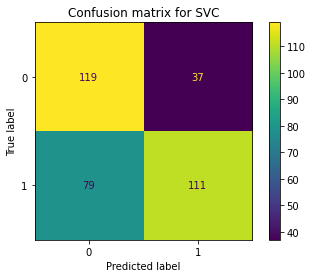

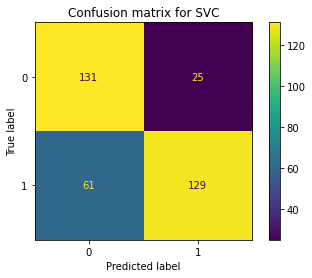

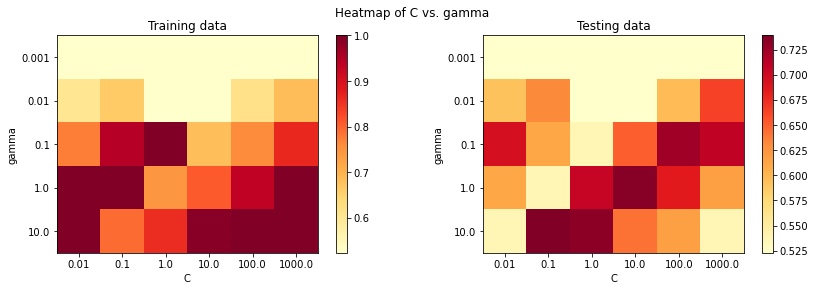

In [9]:
# Test a few different hyperparameters for SVM: C, gamma
c_vals_svm = [0.01,0.1,1.0,10.0,100.0,1000.0]
g_vals_svm = [0.001,0.01,0.1,1.0,10.0]
param_grid_svm = {'C': c_vals_svm, 'gamma' : g_vals_svm}

# Train a dummy SVM model with default values
dummy_svm = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.svm.SVC)

# Train different svm models, using grid search and cross validation to find best hyperparameters.
gs_svm = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.svm.SVC,param_grid_svm,kernel='rbf',random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_svm,X_tst,y_tst)

# Plot confusion matrix for best estimator of SVM
plot_confusion_matrix(gs_svm.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_svm, c_vals_svm, g_vals_svm, 'C', 'gamma')

### 1.3 Decision Tree

Dummy model: DecisionTreeClassifier(random_state=0)
With 100.0% train accuracy
With 52.601% test accuracy
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=0)
With 69.814% train accuracy
With 63.584% test accuracy


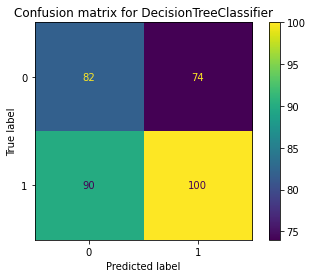

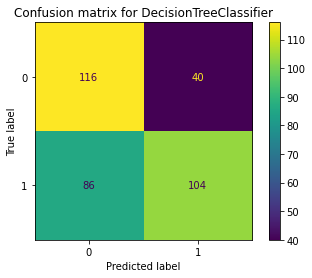

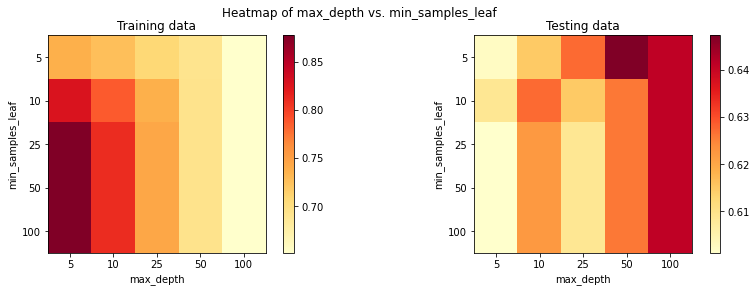

In [11]:
# Test a few different hyperparameters for Decision Tree: max_depth, min_samples_leaf
dep_vals_dt = [5, 10, 25, 50, 100]
samp_leaf_dt = [5, 10, 25, 50, 100]
param_grid_dt = {'max_depth' : dep_vals_dt, 'min_samples_leaf' : samp_leaf_dt}

# Train a dummy Decision Tree model with default values
dummy_dt = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.tree.DecisionTreeClassifier)

# Train different decision tree  models, using grid search and cross validation to find best hyperparameters.
gs_dt = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.tree.DecisionTreeClassifier,param_grid_dt,random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_dt,X_tst,y_tst)

# Plot confusion matrix for best estimator of decision tree
plot_confusion_matrix(gs_dt.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_dt, dep_vals_dt, samp_leaf_dt, 'max_depth', 'min_samples_leaf')

### 1.4 Random Forest

Dummy model: RandomForestClassifier(random_state=0)
With 100.0% train accuracy
With 68.786% test accuracy
Fitting 3 folds for each of 56 candidates, totalling 168 fits
Best estimator: RandomForestClassifier(max_depth=10, n_estimators=250, random_state=0)
With 94.534% train accuracy
With 67.341% test accuracy


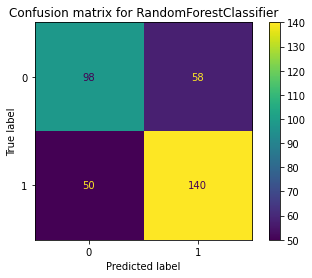

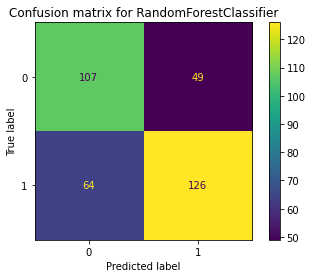

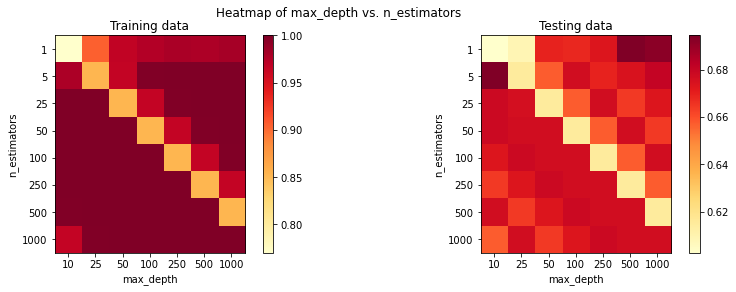

In [18]:
# Test a few different hyperparameters for Random Forest: max_depth, n_estimators
dep_vals_rf = [10,25,50, 100,250,500,1000]
est_vals_rf = [1,5,25,50,100,250,500,1000]
param_grid_rf = {'max_depth': dep_vals_rf, 'n_estimators' : est_vals_rf}

# Train a dummy Random Forest model with default values
dummy_rf = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.RandomForestClassifier)

# Train different random forest models, using grid search and cross validation to find best hyperparameters.
gs_rf = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.RandomForestClassifier,param_grid_rf,random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_rf,X_tst,y_tst)

# Plot confusion matrix for best estimator of random forest
plot_confusion_matrix(gs_rf.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_rf, dep_vals_rf, est_vals_rf, 'max_depth', 'n_estimators')

### 1.5 K-nearest Neighbours

Dummy model: KNeighborsClassifier()
With 74.286% train accuracy
With 61.85% test accuracy
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=29)
With 68.447% train accuracy
With 66.763% test accuracy


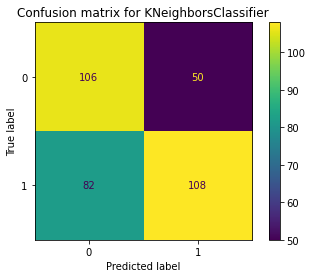

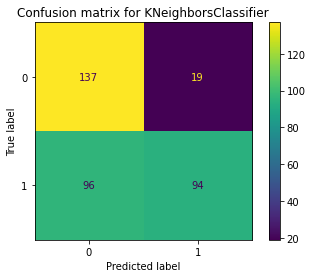

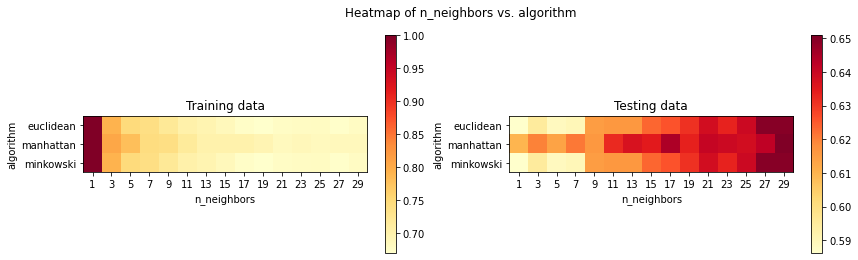

In [24]:
# Test a few different hyperparameters for K-nearest neighbours: n_neighbors, algorithm
n_vals_k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
m_vals_k = ['euclidean', 'manhattan', 'minkowski']
param_grid_knn = {'n_neighbors': n_vals_k, 'metric' : m_vals_k}

# Train a dummy KNN model with default values
dummy_knn = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.neighbors.KNeighborsClassifier)

# Train different KNN models, using grid search and cross validation to find best hyperparameters.
gs_knn = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.neighbors.KNeighborsClassifier,param_grid_knn)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_knn,X_tst,y_tst)

# Plot confusion matrix for best estimator of KNN
plot_confusion_matrix(gs_knn.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_knn, n_vals_k, m_vals_k, 'n_neighbors', 'algorithm')

### 1.6 AdaBoost

Dummy model: AdaBoostClassifier()
With 76.77% train accuracy
With 68.497% test accuracy
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best estimator: AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=80,
                   random_state=0)
With 79.503% train accuracy
With 67.341% test accuracy


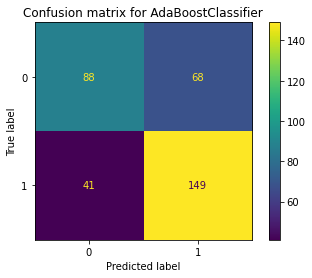

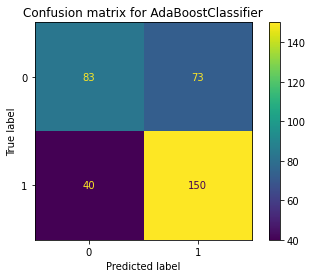

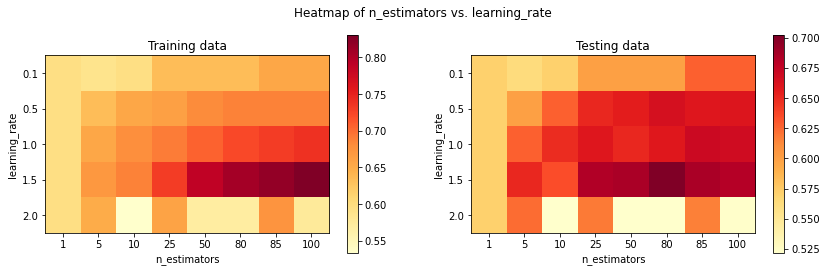

In [29]:
# Test a few different hyperparameters for AdaBoost: n_estimators, learning_rate
est_vals_ada = [1,5,10,25,50,80,85,100]
learn_vals_ada = [0.1, 0.5, 1.0, 1.5, 2.0]
param_grid_ada = {'n_estimators': est_vals_ada, 'learning_rate' : learn_vals_ada}

# Train a dummy AdaBoost model with default values
dummy_ada = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.AdaBoostClassifier)

# Train different AdaBoost models, using grid search and cross validation to find best hyperparameters.
gs_ada = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.AdaBoostClassifier,param_grid_ada, algorithm='SAMME', random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_ada,X_tst,y_tst)

# Plot confusion matrix for best estimator of AdaBoost
plot_confusion_matrix(gs_ada.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_ada, est_vals_ada, learn_vals_ada, 'n_estimators', 'learning_rate')

### 1.7 Gaussian Naive Bayes

Dummy model: GaussianNB()
With 63.106% train accuracy
With 45.087% test accuracy
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best estimator: GaussianNB(var_smoothing=1e-08)
With 64.348% train accuracy
With 45.087% test accuracy


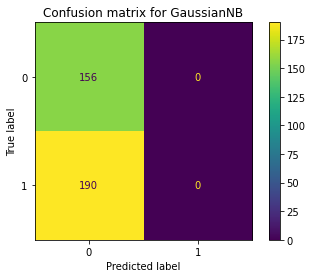

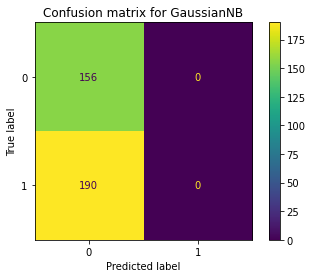

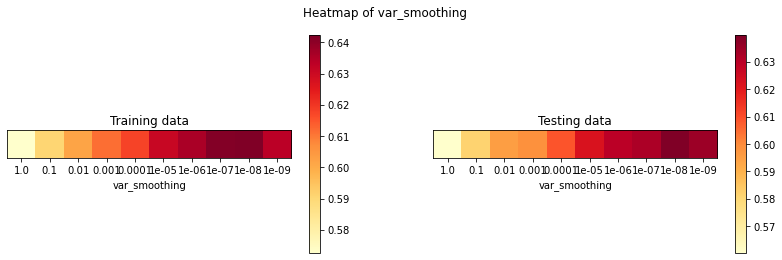

In [32]:
# Test a few different hyperparameters for Gaussian Naive Bayes: var_smoothing
smooth_gnb = np.logspace(0,-9, num=10)
param_grid_gnb = {'var_smoothing' : smooth_gnb}

# Train a dummy Gaussian Naive Bayes model with default values
dummy_gnb = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.naive_bayes.GaussianNB)

# Train different Gaussian Naive Bayes models, using grid search and cross validation to find best hyperparameters.
gs_gnb = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.naive_bayes.GaussianNB,param_grid_gnb)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_gnb,X_tst,y_tst)

# Plot confusion matrix for best estimator of Gaussian Naive Bayes
plot_confusion_matrix(gs_gnb.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_1(gs_gnb, smooth_gnb, 'var_smoothing')

### 1.8 Neural Network

In [ ]:
# Test a few different hyperparameters for Neural Networks: hidden_layer_sizes, solver
hl_vals = [(),(10,),(50,),(100,),(10,10),(50,50),(100,50),(100,100)]
solv_vals = ['sgd','adam']
param_grid_nn = {'hidden_layer_sizes' : hl_vals, 'solver' : solv_vals}

# Train a dummy Neural Net model with default values
dummy_nn = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.neural_network.MLPClassifier)

# Train different Neural Net models, using grid search and cross validation to find best hyperparameters.
gs_nn = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.neural_network.MLPClassifier,param_grid_nn,activation='relu',max_iter=1000,batch_size=100,learning_rate_init=0.01,random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_nn,X_tst,y_tst)

# Plot confusion matrix for best estimator of Neural Net
plot_confusion_matrix(gs_nn.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_nn, hl_vals, solv_vals, 'hidden_layer_sizes', 'solver')

Dummy model: MLPClassifier()
With 83.305% train accuracy
With 81.511% test accuracy
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/davidrady/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# 2.0 Default Credit Dataset

In [33]:
data_xls = load_xls_file("./data/default of credit card clients.xls",2,1)
X,y = split_data(data_xls,23,1)
X_trn, X_tst, y_trn, y_tst = preprocess(X,y)